# 전처리
### 1. 경로확인

In [1]:
import os

os.chdir('D:/project_mini/kaggle_face_mask_detection')
os.getcwd()

'D:\\project_mini\\kaggle_face_mask_detection'

### 2. 파일 로드

In [2]:
from glob import glob
from natsort import natsorted

annotation_list = natsorted(glob('./annotations/*.xml'))
img_list = natsorted(glob('./images/*.png'))
print(len(annotation_list))
print(len(img_list))

853
853


glob 라이브러리는 해당 폴더 안의 특정 조건을 만족하는 파일들을 한번에 긁어올 수 있게 도와줍니다.  
natsort 라이브러리는 문자형 숫자를 숫자처럼 정렬해줍니다.

### 3. XML 파싱

In [3]:
from xml.etree.ElementTree import parse

sample = annotation_list[0]
root = parse(sample).getroot()
print(root.findtext('filename'))
print(root.find('size').findtext('width'))
print(root.find('size').findtext('height'))
print(root.find('size').findtext('depth'))
print(root.findtext('segmented'))
for obj in root.findall('object'):
    print(obj.findtext('name'))
    print(obj.findtext('pose'))
    print(obj.findtext('truncated'))
    print(obj.findtext('occluded'))
    print(obj.findtext('difficult'))
    print(obj.find('bndbox').findtext('xmin'))
    print(obj.find('bndbox').findtext('ymin'))
    print(obj.find('bndbox').findtext('xmax'))
    print(obj.find('bndbox').findtext('ymax'))

maksssksksss0.png
512
366
3
0
without_mask
Unspecified
0
0
0
79
105
109
142
with_mask
Unspecified
0
0
0
185
100
226
144
without_mask
Unspecified
0
0
0
325
90
360
141


xml 파일 하나를 직접 열어보고 가져올 수 있는 데이터는 전부 파싱합니다.

###  4. 샘플 이미지 확인

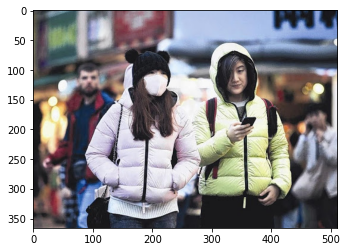

In [4]:
import cv2
import matplotlib.pyplot as plt

sample_img = cv2.cvtColor(cv2.imread(img_list[0]), cv2.COLOR_BGR2RGB)
plt.imshow(sample_img)
plt.show()

cv2 라이브러리는 BGR형식이기 때문에 항상 cvtColor함수를 이용해서 RGB로 바꾸어 주어야 합니다.

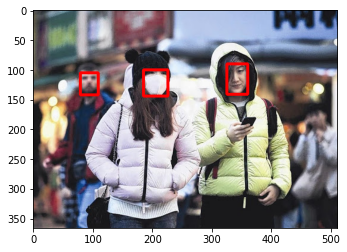

In [5]:
for obj in root.findall('object'):
    cv2.rectangle(
        img=sample_img,
        pt1=(int(obj.find('bndbox').findtext('xmin')), int(obj.find('bndbox').findtext('ymin'))),
        pt2=(int(obj.find('bndbox').findtext('xmax')), int(obj.find('bndbox').findtext('ymax'))),
        color=(255, 0, 0),
        thickness=4
        )
plt.imshow(sample_img)
plt.show()

cv2.rectangle 함수를 이용하여 바운딩박스를 직접 나타내 보았습니다.

### 5. 데이터프레임 제작

In [6]:
import pandas as pd

columns_list = [
    'filename', 'width', 'height', 'depth', 'segmented', 'name', 'pose',
    'truncated', 'occluded', 'difficult', 'xmin', 'ymin', 'xmax', 'ymax'
]
df = pd.DataFrame(columns=columns_list)
df

,filename,width,height,depth,segmented,name,pose,truncated,occluded,difficult,xmin,ymin,xmax,ymax


In [7]:
from tqdm import tqdm

df = pd.DataFrame(columns=columns_list)

for xml in tqdm(annotation_list):
    root = parse(xml).getroot()
    for obj in root.findall('object'):
        data = {}
        data[columns_list[0]] = root.findtext('filename')[:-4]
        data[columns_list[1]] = root.find('size').findtext('width')
        data[columns_list[2]] = root.find('size').findtext('height')
        data[columns_list[3]] = root.find('size').findtext('depth')
        data[columns_list[4]] = root.findtext('segmented')
        data[columns_list[5]] = obj.findtext('name')
        data[columns_list[6]] = obj.findtext('pose')
        data[columns_list[7]] = obj.findtext('truncated')
        data[columns_list[8]] = obj.findtext('occluded')
        data[columns_list[9]] = obj.findtext('difficult')
        data[columns_list[10]] = obj.find('bndbox').findtext('xmin')
        data[columns_list[11]] = obj.find('bndbox').findtext('ymin')
        data[columns_list[12]] = obj.find('bndbox').findtext('xmax')
        data[columns_list[13]] = obj.find('bndbox').findtext('ymax')
        df = df.append(data, ignore_index=True)
df

100%|████████████████████████████████████████████████████████████████████████████████| 853/853 [00:10<00:00, 84.82it/s]


,filename,width,height,depth,segmented,name,pose,truncated,occluded,difficult,xmin,ymin,xmax,ymax
0,maksssksksss0,512,366,3,0,without_mask,Unspecified,0,0,0,79,105,109,142
1,maksssksksss0,512,366,3,0,with_mask,Unspecified,0,0,0,185,100,226,144
2,maksssksksss0,512,366,3,0,without_mask,Unspecified,0,0,0,325,90,360,141
3,maksssksksss1,400,156,3,0,with_mask,Unspecified,0,0,0,321,34,354,69
4,maksssksksss1,400,156,3,0,with_mask,Unspecified,0,0,0,224,38,261,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,maksssksksss850,400,200,3,0,with_mask,Unspecified,0,0,0,146,30,176,60
4068,maksssksksss850,400,200,3,0,with_mask,Unspecified,0,0,0,323,47,351,78
4069,maksssksksss851,301,400,3,0,with_mask,Unspecified,0,0,0,66,205,156,330
4070,maksssksksss852,267,400,3,0,with_mask,Unspecified,0,0,0,139,94,198,147


총 4072개의 바운딩박스가 있음을 확인할 수 있습니다.

###  6. 데이터 탐색

In [8]:
print(df.nunique())

filename     853
width         39
height       104
depth          1
segmented      1
name           3
pose           1
truncated      1
occluded       1
difficult      1
xmin         406
ymin         270
xmax         411
ymax         356
dtype: int64


853개의 파일을 확인가능하며, name 칼럼이 3개인 것에 주목해 보아야합니다.  
다른 칼럼의 고유값이 1이라는 것은 분석에 영샹을 주지 않는다는 뜻이므로 이번 분석에서는 제외하도록 하겠습니다.

In [9]:
df.name.value_counts()

with_mask                3232
without_mask              717
mask_weared_incorrect     123
Name: name, dtype: int64

In [10]:
df.name.value_counts()/df.shape[0]

with_mask                0.793713
without_mask             0.176081
mask_weared_incorrect    0.030206
Name: name, dtype: float64

총 3개의 카테고리로 나뉘어 있으며 클래스 불균형이 약간 존재합니다.  
마스크 착용사진이 약 79%, 미착용이 약 18%, 잘못 착용이 약 3% 입니다.

In [11]:
labels = list(df.name.unique())
print(labels)

['without_mask', 'with_mask', 'mask_weared_incorrect']


In [24]:
df.width = df.width.astype(int)
df.height = df.height.astype(int)
print(max(df.width))
print(max(df.height))
df[df.width == 600]

600
600


,filename,width,height,depth,segmented,name,pose,truncated,occluded,difficult,xmin,ymin,xmax,ymax
30,maksssksksss6,600,405,3,0,with_mask,Unspecified,0,0,0,254,100,387,260
501,maksssksksss106,600,399,3,0,with_mask,Unspecified,0,0,0,154,51,423,391
1675,maksssksksss340,600,400,3,0,with_mask,Unspecified,0,0,0,59,1,105,55
1676,maksssksksss340,600,400,3,0,without_mask,Unspecified,0,0,0,133,83,195,140
1677,maksssksksss340,600,400,3,0,with_mask,Unspecified,0,0,0,243,85,308,147
1678,maksssksksss340,600,400,3,0,with_mask,Unspecified,0,0,0,458,68,527,157
2540,maksssksksss525,600,399,3,0,mask_weared_incorrect,Unspecified,0,0,0,319,128,486,307
2847,maksssksksss592,600,600,3,0,with_mask,Unspecified,0,0,0,121,227,384,495
3425,maksssksksss702,600,317,3,0,with_mask,Unspecified,0,0,0,9,170,60,229
3426,maksssksksss702,600,317,3,0,with_mask,Unspecified,0,0,0,165,90,202,124


In [25]:
df[df.height == 600]

,filename,width,height,depth,segmented,name,pose,truncated,occluded,difficult,xmin,ymin,xmax,ymax
2847,maksssksksss592,600,600,3,0,with_mask,Unspecified,0,0,0,121,227,384,495


In [26]:
df.width.value_counts()

400    3684
301     186
267      71
512      31
600      19
510      10
300      10
316       6
225       6
332       4
268       4
250       3
266       2
323       2
251       2
279       2
252       2
193       2
298       2
500       2
382       2
450       2
398       2
335       1
381       1
306       1
479       1
560       1
259       1
441       1
358       1
275       1
350       1
365       1
280       1
246       1
380       1
339       1
309       1
Name: width, dtype: int64

In [27]:
df.heigh.value_counts()

267    986
225    635
400    369
226    342
300    324
      ... 
575      1
238      1
600      1
218      1
235      1
Name: height, Length: 104, dtype: int64

In [28]:
df[df.width>400]

,filename,width,height,depth,segmented,name,pose,truncated,occluded,difficult,xmin,ymin,xmax,ymax
0,maksssksksss0,512,366,3,0,without_mask,Unspecified,0,0,0,79,105,109,142
1,maksssksksss0,512,366,3,0,with_mask,Unspecified,0,0,0,185,100,226,144
2,maksssksksss0,512,366,3,0,without_mask,Unspecified,0,0,0,325,90,360,141
30,maksssksksss6,600,405,3,0,with_mask,Unspecified,0,0,0,254,100,387,260
387,maksssksksss84,512,354,3,0,with_mask,Unspecified,0,0,0,64,129,110,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,maksssksksss788,512,340,3,0,with_mask,Unspecified,0,0,0,14,95,45,131
3806,maksssksksss788,512,340,3,0,with_mask,Unspecified,0,0,0,116,93,147,126
3807,maksssksksss788,512,340,3,0,with_mask,Unspecified,0,0,0,210,105,241,137
3808,maksssksksss788,512,340,3,0,with_mask,Unspecified,0,0,0,307,92,332,123


너비와 높이의 최대값은 모두 600px입니다.  
width의 최빈값이 400px이고, 400px보다 큰 사진데이터는 총 67개의 바운딩박스로 약 1.65%이며 무시해도 되는 수준입니다.  

### 7. YOLO용 라벨데이터 생성

In [29]:
def cvt_yolo(w, h, x1, y1, x2, y2):
    w, h, x1, y1, x2, y2 = map(int, (w, h, x1, y1, x2, y2))
    x_center = (x1 + x2) / (2 * w)
    y_center = (y1 + y2) / (2 * h)
    width = (x2 - x1) / w
    height = (y2 - y1) / h
    x_center, y_center, width, height = map(lambda x : str(round(x, 4)), (x_center, y_center, width, height))
    return x_center, y_center, width, height
print(cvt_yolo('512', '366', '79', '105', '109' ,'142'))

('0.1836', '0.3374', '0.0586', '0.1011')


바운딩 박스좌표 포맷은 총 3가지입니다.
+ 왼쪽 위 한 점의 좌표(x1, y1)와 오른쪽 아래 한 점의 좌표(x2, y2) (예시 : cv2.rectangle 함수, 현xml파일 bndbox형식 등)
+ 왼쪽 위 한 점의 좌표(x, y)와 너비 그리고 높이(w, h)  (예시 : Megadetector 등)
+ 중심 한 점의 좌표(x, y)와 너비 그리고 높이(w, h)  (예시 : YOLO 등)   
  
또한 YOLO의 경우 전체 너비 및 높이를 1을 기준으로 나타내기 때문에
사용하기 위해 알맞은 좌표값으로 변환해 주어야합니다.

In [30]:
img_dir = './images/'
lbl_dir = './labels/'
os.makedirs(lbl_dir, exist_ok=True)
fname = ''
s = ''

for i in tqdm(range(df.shape[0])):
    if fname != df.iloc[i].filename:  # 다른 그림이면
        if s:  # 문자열이 존재하면
            with open(lbl_dir + fname + '.txt', 'w') as f:
                f.write(s)
                f.close()
            s = ''
        fname = df.iloc[i].filename
    s += str(labels.index(df.iloc[i]['name'])) + ' ' + ' '.join(
        cvt_yolo(df.iloc[i].width, df.iloc[i].height, df.iloc[i].xmin,
                 df.iloc[i].ymin, df.iloc[i].xmax, df.iloc[i].ymax)) + '\n'
if s:  # 문자열이 존재하면
    with open(lbl_dir + '/' + fname + '.txt', 'w') as f:
        f.write(s)
        f.close()

lbl_list = natsorted(glob('./labels/*.txt'))
print(len(lbl_list))

100%|████████████████████████████████████████████████████████████████████████████| 4072/4072 [00:03<00:00, 1116.93it/s]

853


해당 좌표값 데이터를 yolo 형식으로 저장했습니다.  

![](./yolo.JPG)

### 8. 훈련/검증 데이터 분리

In [31]:
from sklearn.model_selection import train_test_split
img_train, img_else, lbl_train, lbl_else = train_test_split(img_list, lbl_list, test_size=0.3, random_state=7)
img_val, img_test, lbl_val, lbl_test = train_test_split(img_else, lbl_else, test_size=0.3, random_state=7)
print(len(img_train), len(img_val), len(img_test))
print(img_train[38], lbl_train[38])

597 179 77
./images\maksssksksss193.png ./labels\maksssksksss193.txt


In [32]:
import shutil

sub_dirs = ['train/', 'val/', 'test/']

for sub_dir in sub_dirs:  # 폴더 체크
    os.makedirs(img_dir + sub_dir, exist_ok=True)
    os.makedirs(lbl_dir + sub_dir, exist_ok=True)
    
# 파일 이동
for file in img_train:
    try:
        shutil.move(file, img_dir + sub_dirs[0] + file.split('\\')[-1])
    except:
        pass
for file in img_val:
    try:
        shutil.move(file, img_dir + sub_dirs[1] + file.split('\\')[-1])
    except:
        pass
for file in img_test:
    try:
        shutil.move(file, img_dir + sub_dirs[2] + file.split('\\')[-1])
    except:
        pass
for file in lbl_train:
    try:
        shutil.move(file, lbl_dir + sub_dirs[0] + file.split('\\')[-1])
    except:
        pass
for file in lbl_val:
    try:
        shutil.move(file, lbl_dir + sub_dirs[1] + file.split('\\')[-1])
    except:
        pass
for file in lbl_test:
    try:
        shutil.move(file, lbl_dir + sub_dirs[2] + file.split('\\')[-1])
    except:
        pass

shutil 라이브러리를 사용하여 파일을 이동시켰습니다.

### 9. yaml 파일 제작

In [33]:
import yaml
from pathlib import Path

p = os.getcwd()

yaml_data = {
    'path': str(Path(p) / 'images'),
    'train': 'train',
    'val': 'val',
    'nc': len(labels),
    'names': labels
}

with open('custom.yaml', 'w') as f:
    yaml.dump(yaml_data, f)

이 부분은 다음 포스팅에서 더 자세하게 다룰텐데요,  
우선 이 yaml 파일이 사진 및 라벨 데이터가 있는 경로, 클래스 개수, 클래스 이름을 담고 있는 파일이라고만 이해하시면 됩니다.